# Credit Card Fraud Detection

Goal Of This Project is build a ML model that can detect fraud transaction based on historical transaction data.


In [7]:
# importing necessery libraries for our project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# First of Load the data and checking the first 5 rows with head

df = pd.read_csv('/content/sample_data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Basic Information about the Dataset and to check the data types of each column and non null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Display statistical summary of the dataset including count, mean, standard deviation, min, max, and percentiles for each feature
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# shape of dataset like how many rows and columns are there basically size of dataset.

df.shape

(284807, 31)

In [12]:
# How many categories are there in class

df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [13]:
# replacing 0 to not fraud and 1 to fraud in class

df['Class'] = df['Class'].replace({0:'Not Fraud',1:'Fraud'})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Not Fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Not Fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Not Fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Not Fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Not Fraud


In [14]:
df['Class'].value_counts()

,count
Class,
Not Fraud,284315
Fraud,492


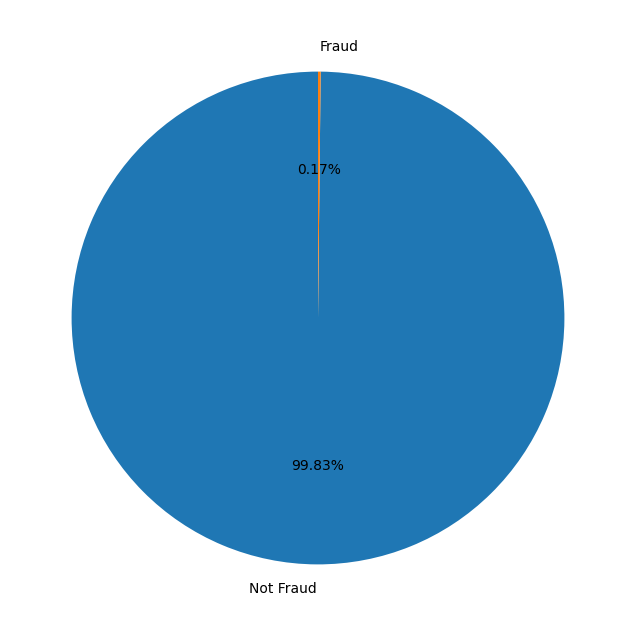

In [15]:
# Visualizing the Dataset for class with  piechart

values = df['Class'].value_counts()
labels =['Not Fraud','Fraud']

plt.figure(figsize=(10,8))
plt.pie(values , labels = labels , autopct = '%1.2f%%' , startangle = 90)
plt.show()

We can see that the dataset is highly imbalanced, meaning there are many more non-fraud transactions than fraud ones. However, we don’t need to change this because, in real life too, the number of fraud transactions is always much smaller. In this dataset, only about 0.17% of the transactions are fraud.
(If we balanced this datset than it will not feasible like in bank 50% fruad is not look like good right!!)

In [16]:
# seperating the target column and other columns :
X = df.drop('Class',axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
# define target variable Y for classification
y = df['Class']
y

,Class
0,Not Fraud
1,Not Fraud
2,Not Fraud
3,Not Fraud
4,Not Fraud
...,...
284802,Not Fraud
284803,Not Fraud
284804,Not Fraud
284805,Not Fraud


In [18]:
# divide our dataset into two part train and test with test size is = 25%

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Logistic Regression

In [23]:
# We use logistic regression and This model will be used to predict whether a transaction is fraud or not
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [24]:
y_pred_lr=lr.predict(X_test_sc)

In [25]:
# check the accuracy
from sklearn.metrics import *

print('Accuracy of Logistic Regression model',accuracy_score(y_test,y_pred_lr)*100)

Accuracy of Logistic Regression model 99.92135052386169


Here we get a 99.9% accuaracy this is because of our imbalanced dataset , so for better and efficient evaluation we use confusion matrix for better understanding.

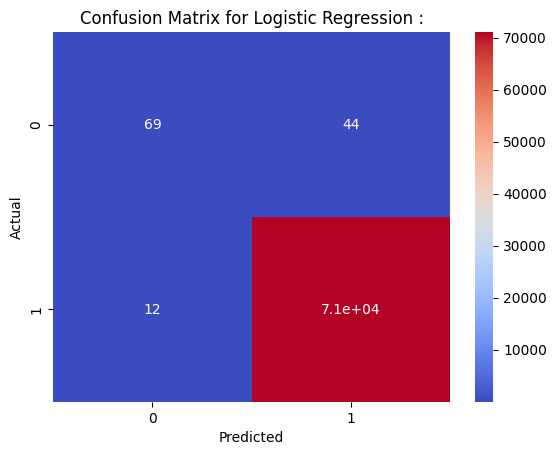

In [26]:
# confusion matrix
cm =confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cm, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix for Logistic Regression :')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

By showing this confusion matrix we say that in 44 transaction model predict the Not fraud while in actual case it is fruad so we need to reduce this number in any way so we detect the transaction is fraud or not which is ou rprimary goal so we use different ML Model and also check thier evaluation and make confusion matrix.

## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()

NB.fit(X_train_sc,y_train)

GaussianNB()

In [28]:
y_pred_NB=NB.predict(X_test_sc)

In [29]:
print('Accuracy of Naive Bayes Model :',accuracy_score(y_test,y_pred_NB)*100)

Accuracy of Naive Bayes Model : 97.82309485688604


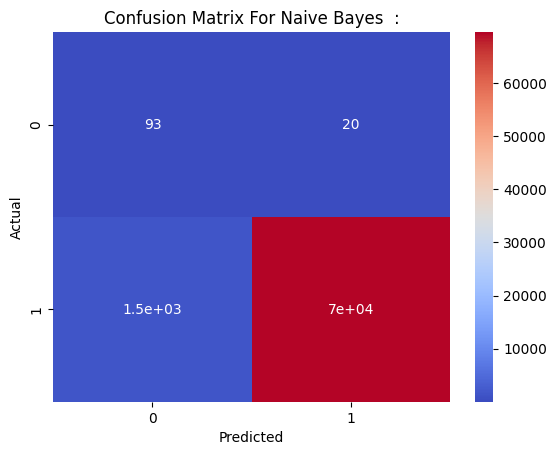

In [30]:
#confusion matrix
c_mat_NB=confusion_matrix(y_test,y_pred_NB)

sns.heatmap(c_mat_NB, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix For Naive Bayes  :')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Here number is reduced by 44 to 20 So we can conclude that naive bayes is better performing and also better than logistic regression model.

## Desicion Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [32]:
y_pred_dt=dt.predict(X_test_sc)

In [33]:
print('Accuracy of Decision Tree Model :',accuracy_score(y_test, y_pred_dt)*100)

Accuracy of Decision Tree Model : 99.91854161399961


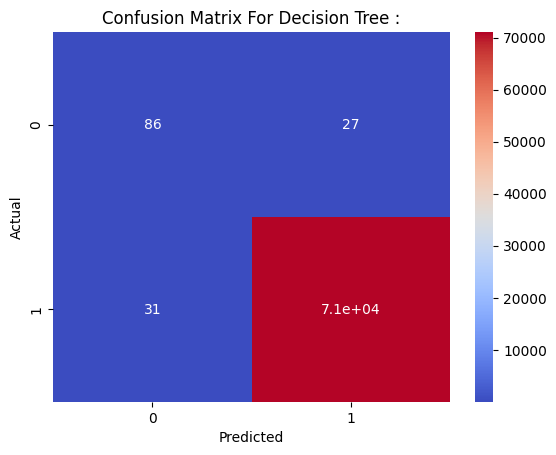

In [34]:
# confusion matrix
c_mat=confusion_matrix(y_test,y_pred_dt)

sns.heatmap(c_mat, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix For Decision Tree :')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Here In Confusion matrix we can see that the value is reduced 44 to 27 means our Desicion tree model works better than Logistic Regression model, Now We use another model and check their score also.

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train_sc,y_train)

RandomForestClassifier()

In [36]:
y_pred_rfc=rfc.predict(X_test_sc)

In [37]:
print('Accuracy of Random Forest Classifier :',accuracy_score(y_test,y_pred_rfc)*100)

Accuracy of Random Forest Classifier : 99.95786635206876


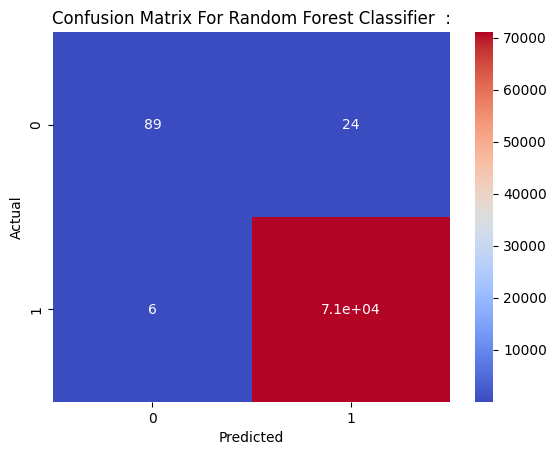

In [38]:
#confusion matrix
c_mat_rfc=confusion_matrix(y_test,y_pred_rfc)

sns.heatmap(c_mat_rfc, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix For Random Forest Classifier  :')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Score Evaluation (Classification Report)

In [39]:
#Logistic Regression
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

       Fraud       0.85      0.61      0.71       113
   Not Fraud       1.00      1.00      1.00     71089

    accuracy                           1.00     71202
   macro avg       0.93      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [41]:
# Naive Bayes
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

       Fraud       0.85      0.61      0.71       113
   Not Fraud       1.00      1.00      1.00     71089

    accuracy                           1.00     71202
   macro avg       0.93      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [40]:
#Decision Tree classifier
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

       Fraud       0.85      0.61      0.71       113
   Not Fraud       1.00      1.00      1.00     71089

    accuracy                           1.00     71202
   macro avg       0.93      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [42]:
# RandomForest Classifier
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

       Fraud       0.85      0.61      0.71       113
   Not Fraud       1.00      1.00      1.00     71089

    accuracy                           1.00     71202
   macro avg       0.93      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202



## Conclusion

Based on the results, we can conclude that the best-performing model is Naive Bayes. It does the best job at reducing the number of actual fraud cases that are incorrectly predicted as non-fraud. After Naive Bayes, the Random Forest and Decision Tree classifiers also perform better than the Logistic Regression model. Our main goal was to find the machine learning model that can best predict fraudulent transactions, and from our comparison, we found that Naive Bayes gives the most accurate results for this task.